In [3]:
#最优化：使损失函数值尽可能小的参数
#最优化方法之一：SGD（缺点：函数形状非均向，比如延伸状，搜索路径非常低效。因为梯度方向没有指向最小值方向）
#SGD:随机梯度下降法(沿梯度方向更新参数)
#SGD类
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
    def update(self,params,grads):
        for key in params.keys():
            params[key]-=self.lr*grads[key]




In [ ]:
#伪代码
network=TwoLayerNet(...)
optimizer=SGD()#可以替换成其他优化方法
for i in range(10000):
    ...
    x_batch,t_batch=get_mini_batch(...)
    grads=network.gradient(x_batch,t_batch)
    params=network.params
    optimizer.update(params,grads)

In [2]:
#深度学习框架实现了各种最优化方法，提供了可以简单切换这些方法的构造
#最优化方法之二：momentum
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [4]:
#最优化方法之三：AdaGrad 
#为参数的每一元素适当调整学习率
#使变动大（大幅更新）的参数的学习率减少
#过去梯度的平方和
lass AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
#过去梯度比重减少（逐渐遗忘过去梯度）：RMSProp
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]# (1 - self.decay_rate) 逐渐遗忘过去梯度
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

SyntaxError: invalid syntax (<ipython-input-4-684974879af1>, line 5)

In [5]:
#最优化方法之三：Adam
#结合了Momentum（小球在碗中滚动）+AdaGrad（参数的每个元素适当调整更新步伐）的优点
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


===========iteration:0===========
SGD:2.3314042016852623
Momentum:2.3855019264029345
AdaGrad:2.2253366910943297
Adam:2.3322456647036027
===========iteration:100===========
SGD:1.4545154906628592
Momentum:0.3966455063453488
AdaGrad:0.19420471080276897
Adam:0.31604033098908735
===========iteration:200===========
SGD:0.8200154495255951
Momentum:0.32035013472660456
AdaGrad:0.17737946362825294
Adam:0.27847865992884235
===========iteration:300===========
SGD:0.6071658680108765
Momentum:0.30615158262879477
AdaGrad:0.14155101566492534
Adam:0.23805851855228963
===========iteration:400===========
SGD:0.4545490437338115
Momentum:0.2209945294783149
AdaGrad:0.15145477087397402
Adam:0.3017549692474716
===========iteration:500===========
SGD:0.4637140007883661
Momentum:0.24764546931796028
AdaGrad:0.08746913117927316
Adam:0.13680609843452124
===========iteration:600===========
SGD:0.30233548171229263
Momentum:0.10908034908268885
AdaGrad:0.06058732484710702
Adam:0.09706927961894103
===========iteration

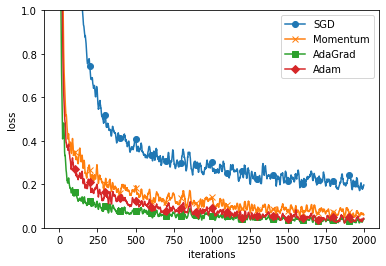

In [6]:
#比较
# coding: utf-8
import os
import sys
sys.path.append(os.getcwd())  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
#权重初始值不能一致（反向传播比如乘法节点权重更新值一致）
#权重初始值如何影响隐藏层的激活值值分布
#各层激活值具有相当广度的分布，推导了合适的权重尺度
